# Welcome to SAS Explore 2022 - Using Python for Data Analytics in SAS® Viya®

### Watch the YouTube demonstration video associated with this notebook: https://www.youtube.com/watch?v=skd9-it5NPU

![image](./images/00_a_intro_SASExplore.png)

![image](./images/00_b_intro_title.png)

![image](./images/00_c_intro_bio.png)

In [1]:
##
## Display image function
##

from IPython.display import Image
def display_image(path):
    ''' The images folder must reside in the same location as this notebook to display the images using the user function'''
    return Image(url='images/' + path)

## Introduction to SAS Viya

### SAS Viya Overview

In [2]:
display_image('01_a_Viya_Overview.png')

SAS Viya is the latest enhancement of SAS. It's built for the entire analytics life cycle, from asking business questions and defining the problem to accessing, exploring, and preparing the necessary data from an assortment of data sources. Then you can build and implement predictive models using a variety of SAS applications or programming languages. Lastly, you can act on the insights, evaluate the analysis, and go straight back into the loop for additional insights.


In [3]:
display_image('01_b_Viya_Overview.png')

SAS Viya consists of many applications that enable you to work with your data no matter your job role or skill level. This can be done through the collection of integrated AI, analytic, and data management solutions in SAS Viya.

- The entry point for SAS Viya is **SAS Drive**, a collaborative interface for accessing, organizing, and sharing content. This application is the gateway to all other applications in SAS Viya. 
- **SAS Studio** is the interactive development environment (IDE) in SAS Viya that enables you to program, build flows, and even use point-and-click tools to process your data. 
- **SAS Visual Analytics** enables you to visualize data, build statistical models, and create interactive dashboards with an easy-to-use point-and-click interface.  
- **SAS Data Studio** is the data preparation application that enables you to easily prepare data using point-and-click transforms. It also enables you to easily embed custom code if necessary.
- **SAS Visual Statistics**, **SAS Visual Data Mining and Machine Learning**, and **SAS Visual Forecasting** are applications built for data scientists. Users can interactively create and refine predictive machine learning models and forecasts. 
- **SAS Model Manager** streamlines the model life cycle 
- **SAS Environment Manager** manages the entire environment. 

These are just a few of the many applications available in SAS Viya. All of these applications enable individuals in an organization to work with data.


In [4]:
display_image('01_c_Viya_Overview.png')

We discussed that SAS Viya contains a variety of applications to process your data through the entirety of the analytics life cycle, but SAS Viya is much more than that. It's
 also cloud native, allowing scalable, web-based access to quick, accurate, and reliable analytical insights. 
Its in-memory engine and parallel processing capabilities can significantly improve the execution speed of your analytics. 
In its entirety, SAS Viya is a collaborative environment for all users. It enables everyone – data scientists, business analysts, developers, report viewers and executives alike – to collaborate, scale, and operationalize insights. 

How does all of this happen? SAS Viya includes multiple servers. The SAS Compute Server and SAS Cloud Analytic Services, or the CAS server for short. 
The SAS Compute Server enables you to execute traditional SAS code. The SAS Compute Server is the Viya equivalent of the SAS®9 workspace server. 

Then there’s the CAS server.  CAS has a massively parallel processing (MPP) architecture that is appropriate for analyzing big data and resource-intensive programs. It performs parallel processing on resident in-memory data to boost performance and produce lightning-fast results. It is optimal for big data and resource-intensive programs like machine learning. In this course, we focus on working with the CAS server in SAS Viya. 

All of these features are accessed from a web browser, and SAS Viya provides integration with open-source languages like Python, R, REST, JAVA, and LUA.

### CAS Server Overview

In [5]:
display_image('02_a_CAS_Server.png')

The CAS server is the cloud-native, high-performance in-memory analytics and massively parallel processing engine. The CAS server is configured to run on multiple machines. Typically, you will have one controller node and several worker nodes. You need to make a connection to the CAS server from your client. This is called a CAS session or CAS connection. 

SAS Documentation - [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/v_028/casfun/titlepage.htm)

In [6]:
display_image('02_b_CAS_Server.png')

For data to be processed in CAS, data is copied into memory from some data source, and data blocks are automatically distributed across the worker nodes and loaded into memory. This is called serial loading. Once data is loaded into memory it persists in memory until explicitly dropped or the CAS session ends. 

You can also load data into memory in parallel. View the following resources for additional information:
- [Five Approaches for High-Performance Data Loading to the SAS® Cloud Analytic Services Server](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2018/1854-2018.pdf)
-[Parallel data load to SAS Viya](https://communities.sas.com/t5/SAS-Communities-Library/Parallel-data-load-to-SAS-Viya/ta-p/361318#:~:text=In%20SAS%C2%AE%20Viya%E2%84%A2,sets%20into%20the%20CAS%20server.)
- [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)]
- [How to Parallel Load and Compress a SAS® Cloud Analytic Services (CAS) Table](https://blogs.sas.com/content/sgf/2019/10/17/how-to-parallel-load-and-compress-a-sas-cloud-analytic-services-cas-table/)



In [7]:
display_image('02_c_CAS_Server.png')

If you persist the data in memory, it enables multiple users to access the same in-memory table without any additional I/O (data load from disk to memory). Because I/O is more resource intensive, having data preloaded into memory speeds up the processing for all users.   

For example, person A can execute a variety of Python programs, person B can create dashboards using SAS Visual Analytics, and person C can execute machine learning models. All users can do this using the same in-memory table copy. 

In all instances, the controller accepts the programs from the client and distributes code to the workers. The workers perform coordinated parallel processing on their portion of the data, with multiple nodes executing the same actions on different parts of the data at the same time. The controller monitors progress and coordinates re-assembling the result segments produced by each worker. If requested by the client, the controller then returns the results to the client for further processing. Modifications to the in-memory table are not reflected in the physically stored data source. If you want to update the physical data source, the in-memory table must be explicitly saved back to the physical storage location.

In [8]:
display_image('02_d_CAS_Server.png')

The CAS server needs to access data from some physical data source. CAS can access data from a variety of sources using [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_029/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm), including databases, Hadoop, streaming data, path-based files, and data stored in the cloud.

Once data is loaded into memory on the CAS server, you can process that data using CAS actions. Actions are optimized units of work built for the distributed CAS server. CAS actions provide a range of functionality from managing, processing, analyzing, and modeling data, to executing most traditional SAS DATA step, FedSQL, and even DS2! The question is, how can you execute actions? 

SAS Viya provides a variety of interfaces for executing CAS actions. One way to execute actions on the CAS server is to use the native CAS language, or CASL for short. CASL supports executing CAS actions on the CAS server and uses normal programing logic. If you have experience using languages like Lua, Python, or R, CASL will be an easy language to learn.

Instead of using CASL, you can also execute CAS actions through the CAS API using traditional SAS programming, FedSQL, Java, Python, R, Lua, and REST API. This course focuses on using the Python language.

 Lastly, you can use a variety of SAS Viya applications like SAS Visual Analytics to create dashboards, SAS Visual Statistics and SAS Visual Data Mining and Machine Learning for modeling and statistics, and a variety of others. All applications execute actions behind the scenes.


NOTES:
1. With the SAS programming language, many PROCs and much of the traditional DATA step is CAS enabled and can be executed on CAS tables. For more information about how to execute traditional SAS code in SAS Viya, you can view the Programming for SAS Viya course: https://support.sas.com/edu/schedules.html?crs=PGVIYA&ctry=US.
2. For Java, you must use the CASClient class.
3. For Python, R, and Luna, the SWAT package is required. Many familiar methods are available through the SWAT package.
4. The CAS API converts the native language syntax to CAS actions behind the scenes.
5. Visit the SAS website for detailed information about all available SAS Viya offerings.

In [9]:
display_image('02_e_CAS_Server.png')

You can use Python on your client to explore, prepare, analyze, and model big data on the CAS server using familiar Python syntax along with CAS actions to take advantage of the parallel processing power of CAS. If you are preparing data in CAS, you can then share that data with other users or other SAS Viya applications like SAS Visual Analytics to create shareable dashboards. 

If you are exploring, analyzing, or modeling data in CAS to take advantage of the in-memory parallel processing power,  CAS returns smaller summarized results back to your local Python client. Once the summarized results from the CAS server are returned to your client, you can use native Python packages on the smaller, more manageable data.


In [10]:
display_image('02_f_CAS_Server.png')

The first question is always, Is CAS faster than your open-source environment? Well, it depends. CAS overhead processes might include starting the required services, explicitly loading data and code to the worker nodes, monitoring the progress as the data is processed on each worker node, collating results on the controller node, and delivering final results to the client. 

For small tables and simple processes, the SAS Compute Server or your open-source environment might provide quicker results.


In [11]:
display_image('02_g_CAS_Server.png')

The second question is always, Which programs should I consider executing in CAS? The answer again is "it depends." 

The data size thresholds for your open-source environment might be significantly different, but for large data, for code that runs for a long period of time,  or for processes that are complex and computationally demanding, CAS normally provides much faster results. When maximizing processing speed is essential, benchmark multiple processes to determine the best choice for your specific situation. 

You also want to use CAS to access data in a variety of locations that is already set up in your organization, use specific CAS actions to process data, or to prepare data for use in other SAS Viya applications, such as SAS Visual Analytics.

### SWAT Package Overview
[SWAT Documentation](https://sassoftware.github.io/python-swat/getting-started.html)

In [12]:
display_image('03_a_swat_package.png')

In order to process data with Python on the CAS server, you must use the SAS Scripting Wrapper for Analytics Transfer, or the SWAT package for short. This is an open-source package used with Python, R, and Lua. With the SWAT package, you can write a program that connects to the CAS server, quickly load large amounts of data into memory, analyze the data, and then work with the results of your analysis using familiar techniques in the open-source language of your choice.

The Python SWAT package contains many familiar Pandas methods, functions, and attributes that work like their counterparts. However, not all methods and functions are available, so be sure to download the latest version of the SWAT package for the most up-to-date functionality.

Lastly, the SWAT package also contains an enormous number of CAS actions and CAS methods that can be used to process your data.


In [13]:
display_image('03_b_swat_package.png')

For example, with the SWAT package, you can use the familiar head method from the Pandas API on a CAS table to return the first n rows of a CAS table.

In all cases, the code is translated through the CAS API into the same fetch CAS action behind the scenes and sent to the CAS server. The action is processed in CAS, and the results are sent from the CAS server to the client.

In [14]:
display_image('03_c_a0_swat_package.png')

The CAS API converts familiar Pandas methods into actions behind the scenes, but you can also execute actions directly through the SWAT package.

In this example, you can execute the same fetch CAS action in Python. The action is sent to the CAS server, and CAS processes the action and returns the results to the client. The same action can be used in all languages that work with CAS.


In [15]:
display_image('03_c_a1_swat_package.png')

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data.  These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.


In [16]:
display_image('03_c_a2_swat_package.png')

CAS actions provide a variety of benefits.
- First, CAS actions are optimized to run in the CAS server's massively parallel processing engine for lightening-fast results.
- Second, the same CAS action is used regardless of programming language or application. That means you can use the same CAS action in CASL, Python, R, and more. This enables you to easily pass information between languages.
- When using actions in different languages, the results are equivalent (given seeds).
- Lastly, actions are multi-purpose. Actions perform a specific task, and within that task, an action can also perform a variety of other tasks like create a new table, create calculated columns, filter rows and columns, and group data.


In [17]:
display_image('03_d_swat_package.png')

As an experienced Python programmer, you most likely are familiar with Python packages like Pandas, Matplotlib, NumPy, and seaborn. You might be thinking, “Great, I can use these packages on data in CAS!” 

**False!**

Although these are great packages, they do not execute on data on the CAS server. I'll repeat this because it's very important and a common misconception.  Native Python packages do not execute on data on the CAS server.


In [18]:
display_image('03_e_swat_package.png')

In the end, having both your Python client and the CAS server offers you a lot of flexibility. The goal is to look at each as a tool and determine the best tool for the job.

# Python Demonstration

## 1. Setup

### a. Import Packages

In [19]:
import swat
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None)

## Personal module to connect to CAS. Will not work in other environments
from casConnect import connect_to_cas 

import matplotlib.pyplot as plt
import matplotlib

### b. Load the Demonstration Data to the CAS Server
Data can be found at the [SAS Viya Example Data Sets](https://support.sas.com/documentation/onlinedoc/viya/examples.htm) documentation page. We are using small data for training purposes. The code below loads the data into the CAS server then saves the CAS table as a CSV file in the **Casuser** caslib.

**REQUIREMENT: Modify your CAS connection information below.**

In [ ]:
##
## REQUIRED: Modify your connection information to the CAS server below.
##

######## EXTERNAL JUPYTERHUB ACCESS USING BINARY PROTOCOL###################
#cashost ='<CAS_IP>'
#conn = swat.CAS(cashost, casport, '<##user##>', '<##password##>')
############################################################################

#######################EXTERNAL JUPYTERHUB ACCESS USING HTTP PROTOCOL ##############################################################################
#conn = swat.CAS('https://<##prefix##>.<##region##>.cloudapp.azure.com/cas-shared-default-http', username='<##user##>', password ='<##password##>')
####################################################################################################################################################

## Connect to the CAS server. 
conn = connect_to_cas()

## Load data from the SAS example data sets to the CAS server as a CAS table
conn.upload('https://support.sas.com/documentation/onlinedoc/viya/exampledatasets/TSAClaims2002_2017.csv',
            casout = {'name':'tsa_claims_raw',
                      'caslib':'casuser',
                      'replace':True},
            importoptions = {'filetype':'csv', 
                             'encoding':'latin1',
                             'guessrows': 220000})


## Save the CAS table as a CSV file in the Casuser caslib
conn.save(table = 'tsa_claims_raw', caslib = 'casuser', 
          name = 'tsa_claims_raw.csv', 
          replace = True)


## Terminate the CAS session
conn.terminate()

#### Data Information

The Transportation Security Administration (TSA) is an agency of the United States Department of Homeland Security that has authority over the security of transportation systems within, and connecting to the United States.

The data that you use is **TSAClaims2002_2017.csv**, which was created from the following:
- TSA Airport Claims data from https://www.dhs.gov/tsa-claims-data.
- FAA Airport Facilities data from https://www.faa.gov/airports/airport_safety/airportdata_5010/.

The **TSAClaims2002_2017.csv** file was created by concatenating each individual TSA Airport
Claims table. After the concatenation, the data was joined with the FAA Airport Facilities data.

## 2. Connect to the CAS Server

In [22]:
display_image('04_connect_to_cas.png')

To begin working with CAS, you need to make a connection to the CAS server. This is known as a CAS session. A CAS session contains a variety of information and properties. These include server status and licensing, as well as session properties like timeout, locale, active caslib, metrics, and more. 

You can also create multiple CAS sessions on the CAS server, and these CAS sessions are independent of each other. One reason you would want to create multiple CAS sessions is to execute programs in parallel. One example would be if you want to execute three different machine learning models at the same time. Otherwise, if you do not terminate your connection to CAS, you might mistakenly create multiple connections to CAS, consuming resources.


Make a connection to the CAS server.

In [ ]:
# conn = swat.CAS('server.demo.sas.com', 30570, 'student', 'Metadata0')
conn = connect_to_cas()
conn

In [25]:
type(conn)

swat.cas.connection.CAS

Show the status of the CAS server.

In [ ]:
conn.about()

## 3. Explore Available Data in the CAS Server

[SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/v_029/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm)

In [27]:
display_image('05_a_Caslibs.png')

CAS stores and accesses data via caslibs. Caslibs provide a common interface into accessing different data sources. No matter which data source you access in CAS, it is connected via a caslib. Caslibs connect into a variety of data sources in your organization.

In [28]:
display_image('05_b_Caslibs.png')

A caslib consists of three main parts. 

First, there’s the data source portion. The data source portion contains connection information to a physical data source for storage. Data might be stored on disk in a path with familiar formats such as SAS data sets, CSV, Microsoft Excel, or parquet files, or stored in databases, the cloud, Hadoop, or other systems. The data source portion stores the connection and authorization information required for interacting with those files using SAS Viya data connectors. Data stored in the data source portion of a caslib is generally referred to as files. Files in the data source area cannot be processed directly. 

The second part of a caslib is the in-memory portion. The in-memory portion provides a space to hold tables that can have operations performed on them. You can almost think of a CAS table as a DataFrame on the CAS server. A file must first be loaded into memory from a data source. Data loaded into memory is generally referred to as tables or CAS tables. >When they are loaded, in-memory tables are available for processing, and they persist in memory. Because there's no connection between the in-memory copy and the data source file, if you want to permanently keep changes made to the data during processing, the in-memory table should be explicitly written back to the data source. If you are done with the CAS table, you can drop the table. We discuss this more later.

Lastly, a caslib contains access controls about who can access that specific caslib.

### a. View Available Caslibs (Data Sources) in the CAS Server

In [29]:
conn.caslibInfo()

,Name,Type,Description,Path,Definition,Subdirs,Local,Active,Personal,Hidden,Transient
0,CASUSER(Peter.Styliadis@sas.com),PATH,Personal File System Caslib,/cas/data/caslibs/casuserlibraries/peter.styliadis@sas.com/,,1.0,0.0,1.0,1.0,0.0,1.0
1,cpgretl,PATH,,/cas/data/caslibs/cpgretail/,,1.0,0.0,0.0,0.0,0.0,0.0
2,CPSAppData,PATH,,/cas/data/caslibs/CPSAppData/,,0.0,0.0,0.0,0.0,0.0,0.0
3,EDUPub,PATH,,/cas/data/caslibs/edupub/,,0.0,0.0,0.0,0.0,0.0,0.0
4,EP_CommunityCollege,PATH,,/cas/data/caslibs/educationpractice/EP_CommunityCollege/,,0.0,0.0,0.0,0.0,0.0,0.0
5,EP_DOE,PATH,,/cas/data/caslibs/educationpractice/EP_DOE/,,0.0,0.0,0.0,0.0,0.0,0.0
6,EP_Forecasting,PATH,,/cas/data/caslibs/educationpractice/EP_Forecasting/,,0.0,0.0,0.0,0.0,0.0,0.0
7,EP_K12,PATH,,/cas/data/caslibs/educationpractice/EP_K12/,,0.0,0.0,0.0,0.0,0.0,0.0
8,EP_SAfE,PATH,,/cas/data/caslibs/educationpractice/EP_SAfE/,,0.0,0.0,0.0,0.0,0.0,0.0
9,EP_Shapes,PATH,,/cas/data/caslibs/educationpractice/EP_Shapes/,,0.0,0.0,0.0,0.0,0.0,0.0


Specify the caslib to use.

In [30]:
ds_caslib = 'casuser'

### b. View Available Data Source Files in a Caslib

In [31]:
conn.fileInfo(caslib = ds_caslib)

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2022-08-16T21:25:39+00:00,1.976304e+09
1,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
2,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
3,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
4,-rwxr-xr-x,sas,sas,warranty_claims.parquet,4096,NONE,2022-11-17T13:43:26+00:00,1.984312e+09
5,-rwxr-xr-x,sas,sas,HMEQ_SAS.parquet,4096,NONE,2022-11-17T13:46:56+00:00,1.984312e+09
6,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
7,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,classCopy.sashdat,20904,NONE,2022-12-21T16:59:03+00:00,1.987261e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-01-06T14:29:25+00:00,1.988635e+09


### c. View Available In-Memory CAS Tables in a Caslib

In [32]:
conn.tableInfo(caslib = ds_caslib)

NOTE: No tables are available in caslib CASUSER(Peter.Styliadis@sas.com) of Cloud Analytic Services.


+ Elapsed: 0.0105s, user: 0.0063s, sys: 0.0153s, mem: 1.43mb

## 4. Load a Data Source File into Memory

In [33]:
display_image('06_Loading_data_to_cas.png')

There are two main ways that you can load data into memory in CAS. One way is to load data files that are stored in the data source portion of a caslib. These are called server-side files, and it's considered a server-side load. Server-side files are simply files that are associated with a caslib. These are the most common types of files loaded into memory.
 
Another way to load files in memory is through the client. These are called client-side files, and they reside on your client machine. To load client-side files, you must have the correct permissions.

### a. Load a Server-Side File into Memory

In [ ]:
conn.loadTable(path = 'tsa_claims_raw.csv', caslib = ds_caslib,   ## Specify the data source file and caslib location
               casOut = {'name':'tsa_claims_bad',                 ## Specify the output CAS table information
                         'caslib':ds_caslib,
                         'replace':True})

View the available in-memory tables on the CAS server.

In [35]:
conn.tableInfo(caslib = ds_caslib)

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TSA_CLAIMS_BAD,220855,14,0,utf-8,2023-01-16T13:15:09+00:00,2023-01-16T13:15:09+00:00,2023-01-16T13:15:09+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,tsa_claims_raw.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-16T13:13:53+00:00,1.989494e+09


### b. Explore the CAS Table

Reference the CAS table.

In [36]:
claims_bad = conn.CASTable('tsa_claims_bad', caslib = ds_caslib)
claims_bad

CASTable('tsa_claims_bad', caslib='casuser')

View the object type.

In [37]:
type(claims_bad)

swat.cas.table.CASTable

View the attributes of the CAS table.

In [38]:
claims_bad.shape

(220855, 14)

View details about the CAS table.

In [39]:
claims_bad.tableDetails()

,Node,Blocks,Active,Rows,IndexSize,DataSize,VardataSize,CompressedSize,CompressionRatio,Mapped,MappedMemory,Unmapped,UnmappedMemory,Allocated,AllocatedMemory,DeletedRows,TableLocation
0,ALL,146,73,220855,0,68803206,26399046,0,0,73,68812152,73,68812152,0,0,0,CAS


Print information about the CAS table.

In [40]:
claims_bad.info(verbose = True)

CASTable('tsa_claims_bad', caslib='casuser')
Data columns (total 14 columns):
                    N  Miss     Type
Claim_Number   192269  True   double
Date_Received  220595  True   double
Incident_Date  218526  True   double
Airport_Code   212336  True  varchar
Airport_Name   212336  True  varchar
Claim_Type     212947  True  varchar
Claim_Site     220120  True  varchar
Item_Category  216894  True  varchar
Close_Amount   187109  True   double
Disposition    207071  True  varchar
StateName      209182  True  varchar
State          209182  True  varchar
County         207441  True  varchar
City           209182  True  varchar
dtypes: double(4), varchar(10)
data size: 68803206
vardata size: 26399046
memory usage: 0


**NOTE: Claim_Number should not be missing.**

Why are there missing values in the **Claim_Number** column? View a sample image of the raw CSV file.

In [41]:
display_image('07_view_sample_CSV_file.png')

**NOTE: By default the loadTable action scans the first 20 rows of a CSV file to determine the data types for the columns.**

Preview the CAS table.

In [42]:
claims_bad.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition,StateName,State,County,City
0,2.013103e+12,19620.0,19610.000000,SAN,San Diego International,Passenger Property Loss,Checked Baggage,Other,NaN,-,CALIFORNIA,CA,SAN DIEGO,SAN DIEGO
1,2.013090e+12,19561.0,19490.000000,SAN,San Diego International,Property Damage,Checkpoint,Computer & Accessories,246.11,Approve in Full,CALIFORNIA,CA,SAN DIEGO,SAN DIEGO
2,2.014021e+12,19760.0,19749.000000,SAN,San Diego International,Property Damage,Checked Baggage,Other,35.00,Approve in Full,CALIFORNIA,CA,SAN DIEGO,SAN DIEGO
3,2.013103e+12,19619.0,19569.000000,SAN,San Diego International,Property Damage,Checkpoint,Travel Accessories,200.00,Approve in Full,CALIFORNIA,CA,SAN DIEGO,SAN DIEGO
4,2.014021e+12,19758.0,19607.590278,SAN,San Diego International,Passenger Property Loss,Checked Baggage,Clothing,0.00,Deny,CALIFORNIA,CA,SAN DIEGO,SAN DIEGO


**NOTE: The Date_Received and Incident_Date columns are SAS date values and need a SAS format.**

## 5. Reload the CSV File as a CAS Table and Fix the Issues

In [43]:
conn.loadTable(path = 'tsa_claims_raw.csv', caslib = ds_caslib,              ## Specify the data source file in the caslib
               casOut = {'name':'tsa_claims_raw',                            ## Specify the CAS table to create
                         'caslib':ds_caslib, 
                         'replace':True},
               importOptions = {'fileType':'csv',                            ## Modify the CSV import options
                                'guessRows':220000,                          ## Scan 220,000 rows to determine the column data type
                                'vars': {                                    ## Add a SAS format to the Incident_Date, Date_Received and Close_Amount columns
                                  'Incident_Date':{'format':'mmddyy10.'},
                                  'Date_Received':{'format':'mmddyy10.'},
                                  'Close_Amount':{'format':'dollar20.2'}
                                }
                               }
              )

NOTE: Cloud Analytic Services made the file tsa_claims_raw.csv available as table TSA_CLAIMS_RAW in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'TSA_CLAIMS_RAW'

[casTable]

 CASTable('TSA_CLAIMS_RAW', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.377s, user: 1.4s, sys: 0.471s, mem: 464mb

In [44]:
conn.tableInfo(caslib = ds_caslib)

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TSA_CLAIMS_BAD,220855,14,0,utf-8,2023-01-16T13:15:09+00:00,2023-01-16T13:15:09+00:00,2023-01-16T13:15:28+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,tsa_claims_raw.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-16T13:13:53+00:00,1.989494e+09
1,TSA_CLAIMS_RAW,220855,14,0,utf-8,2023-01-16T13:15:29+00:00,2023-01-16T13:15:29+00:00,2023-01-16T13:15:29+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,tsa_claims_raw.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-16T13:13:53+00:00,1.989494e+09


Reference and preview the new CAS table.

In [45]:
claims_raw = conn.CASTable('tsa_claims_raw', caslib = ds_caslib)
claims_raw.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition,StateName,State,County,City
0,2006081611123,2006-08-14,2006-07-24,,,Passenger Property Loss,Checked Baggage,"Candles - Decorative and other; Clothing - Shoes, belts, accessories, etc.; Dishes, Pottery, Glassware, Plasticware",NaN,,,,,
1,2006062108380,2006-06-20,2006-06-05,,,Passenger Property Loss,Checkpoint,Jewelry - Fine,NaN,,,,,
2,2006062008258,2006-06-20,2006-05-17,,,Passenger Property Loss,Checked Baggage,"Cosmetics - Perfume, toilet articles, medicines, soaps, etc.; Medicines",NaN,,,,,
3,2006010699056,2006-01-30,2005-12-23,,,Passenger Property Loss,Checked Baggage,Other,NaN,,,,,
4,2006032303625,2006-03-20,2006-03-01,,,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,,,,,


### a. Explore the CAS Table

In [46]:
claims_raw.shape

(220855, 14)

In [47]:
claims_raw.info(verbose = True)

CASTable('tsa_claims_raw', caslib='casuser')
Data columns (total 14 columns):
                    N   Miss     Type
Claim_Number   220855  False  varchar
Date_Received  220595   True   double
Incident_Date  218526   True   double
Airport_Code   212336   True  varchar
Airport_Name   212336   True  varchar
Claim_Type     212947   True  varchar
Claim_Site     220120   True  varchar
Item_Category  216894   True  varchar
Close_Amount   187109   True   double
Disposition    207071   True  varchar
StateName      209182   True  varchar
State          209182   True  varchar
County         207441   True  varchar
City           209182   True  varchar
dtypes: double(3), varchar(11)
data size: 73290911
vardata size: 29119911
memory usage: 0


In [48]:
claims_raw.dtypes

Claim_Number     varchar
Date_Received     double
Incident_Date     double
Airport_Code     varchar
Airport_Name     varchar
Claim_Type       varchar
Claim_Site       varchar
Item_Category    varchar
Close_Amount      double
Disposition      varchar
StateName        varchar
State            varchar
County           varchar
City             varchar
dtype: object

In [49]:
claims_raw.columnInfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Claim_Number,,1,varchar,13,13,,0,0
1,Date_Received,,2,double,8,12,MMDDYY,10,0
2,Incident_Date,,3,double,8,12,MMDDYY,10,0
3,Airport_Code,,4,varchar,3,3,,0,0
4,Airport_Name,,5,varchar,48,48,,0,0
5,Claim_Type,,6,varchar,39,39,,0,0
6,Claim_Site,,7,varchar,15,15,,0,0
7,Item_Category,,8,varchar,834,834,,0,0
8,Close_Amount,,9,double,8,20,DOLLAR,20,2
9,Disposition,,10,varchar,23,23,,0,0


## 6. Overview of Common SWAT Package Python Objects

In [50]:
display_image('08_b_swat_package_objects.png')

Because the SWAT package tries to blend the world of Pandas and CAS into a single world, you have to be aware of whether you are calling a CAS action or a Pandas API method from the SWAT package because the objects returned to the client will differ.

When you execute Pandas methods from the SWAT package, CAS can return a variety of objects to the client, such as a  CASTable, CASColumn, SASDataFrame, pandas.DataFrame, or pandas.Series.

When you execute a CAS action, CAS always returns a CASResults object (Python dictionary) to the Python client. 


In [51]:
display_image('08_c_swat_package_objects.png')

After using a SWAT method or CAS action, the results are returned to the client. Let's investigate a few of the common client-side objects a bit further.

First, if you see a CASTable or CASColumn object, those are simply client-side references to an in-memory table on the CAS server. The physical table is not stored on your client machine. You can think of these objects as simply pointing to a table in CAS. To process a CAS table, you must execute a method or action on the object. The CASTable object is the most important object in the SWAT package other than the CAS connection object.

Another common object that you will see is a SASDataFrame. A SASDataFrame object is a subclass to a pandas.DataFrame. For the most part, you don’t need to worry about the difference between a SASDataFrame and a panda.DataFrame. They work the same way. The only difference is that a SASDataFrame contains extra attributes to store the SAS metadata such as title, label, and name. If you see a SASDataFrame object, that data lives on your client.

Lastly, there is the CASResults object. This is simply a Python dictionary with additional attributes. You can simply work with the CASResults object as you would a Python dictionary. If you see a CASResults object, that data lives on your client.


### a. CASTable Object

In [52]:
type(claims_raw)

swat.cas.table.CASTable

In [53]:
claims_raw

CASTable('tsa_claims_raw', caslib='casuser')

To process a CAS table you must execute a method or action the CASTable object. The data will be processed on the CAS server and the CAS server will return results to the client.

In [54]:
claims_raw.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition,StateName,State,County,City
0,2006081611123,2006-08-14,2006-07-24,,,Passenger Property Loss,Checked Baggage,"Candles - Decorative and other; Clothing - Shoes, belts, accessories, etc.; Dishes, Pottery, Glassware, Plasticware",NaN,,,,,
1,2006062108380,2006-06-20,2006-06-05,,,Passenger Property Loss,Checkpoint,Jewelry - Fine,NaN,,,,,
2,2006062008258,2006-06-20,2006-05-17,,,Passenger Property Loss,Checked Baggage,"Cosmetics - Perfume, toilet articles, medicines, soaps, etc.; Medicines",NaN,,,,,
3,2006010699056,2006-01-30,2005-12-23,,,Passenger Property Loss,Checked Baggage,Other,NaN,,,,,
4,2006032303625,2006-03-20,2006-03-01,,,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,,,,,


Some methods will add parameters to the CASTable object. These parameters will be applied when an action or method is executed. Here the query method adds the where parameter to the CASTable object.

In [55]:
claims_raw.query('Disposition = "Deny"')

CASTable('tsa_claims_raw', caslib='casuser', where='(Disposition = "Deny")')

You can also use familiar bracket notation to filter a CAS table.

In [56]:
claims_raw[claims_raw['Disposition'] == 'Deny']

CASTable('tsa_claims_raw', caslib='casuser', computedvars=['_eq_0_'], computedvarsprogram="_eq_0_ = (Disposition = 'Deny'); ", where='(_eq_0_)')[['Claim_Number', 'Date_Received', 'Incident_Date', 'Airport_Code', 'Airport_Name', 'Claim_Type', 'Claim_Site', 'Item_Category', 'Close_Amount', 'Disposition', 'StateName', 'State', 'County', 'City']]

In [57]:
claims_raw

CASTable('tsa_claims_raw', caslib='casuser')

Add the shape attribute after each technique to apply the filter and return results.

In [58]:
(claims_raw                         ## CAS table
 .query('Disposition = "Deny"')     ## SWAT query method
 .shape                             ## SWAT shape attribute
)

(99600, 14)

In [59]:
claims_raw[claims_raw['Disposition'] == 'Deny'].shape

(99600, 14)

View the CASTable object. Notice the where parameter was temporarily added to the CASTable object. Currently the CASTable object simply references the entire CAS table.

In [60]:
claims_raw

CASTable('tsa_claims_raw', caslib='casuser')

### b. Pandas API Methods from the SWAT Package on a CASTable Object
Using Pandas API methods on a CASTable object will return different objects to the client based on the method used from the SWAT package.

Turn on the trace options in the SWAT package to see what the CAS server executes when using the Pandas API in the SWAT package.

In [61]:
swat.options.cas.trace_actions = True
swat.options.cas.trace_ui_actions = True

The head method executes on the CAS server and returns a SASDataFrame to the client. 

In [62]:
df = claims_raw.head()

display(type(df), df)

[table.fetch]
    _apptag = 'UI'
    _messagelevel = 'error'
    from = 1
    index = True
    sastypes = False
    table.caslib = 'casuser'
    table.name = 'tsa_claims_raw'
    to = 5



swat.dataframe.SASDataFrame

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition,StateName,State,County,City
0,2006081611123,2006-08-14,2006-07-24,,,Passenger Property Loss,Checked Baggage,"Candles - Decorative and other; Clothing - Shoes, belts, accessories, etc.; Dishes, Pottery, Glassware, Plasticware",NaN,,,,,
1,2006062108380,2006-06-20,2006-06-05,,,Passenger Property Loss,Checkpoint,Jewelry - Fine,NaN,,,,,
2,2006062008258,2006-06-20,2006-05-17,,,Passenger Property Loss,Checked Baggage,"Cosmetics - Perfume, toilet articles, medicines, soaps, etc.; Medicines",NaN,,,,,
3,2006010699056,2006-01-30,2005-12-23,,,Passenger Property Loss,Checked Baggage,Other,NaN,,,,,
4,2006032303625,2006-03-20,2006-03-01,,,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,,,,,


The shape attribute from the SWAT package returns a tuple to the client.

In [63]:
type(claims_raw.shape)

[simple.numrows]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'tsa_claims_raw'

[table.tableinfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    caslib = 'casuser'
    name = 'tsa_claims_raw'



tuple

The value_counts method from the SWAT package returns a Series to the client.

In [64]:
vc = (claims_raw         ## CAS table      
      .Disposition       ## CAS column
      .value_counts())   ## value_counts from the SWAT package

display(type(vc), vc)

[table.columninfo]
    _apptag = 'UI'
    _messagelevel = 'error'
    table.caslib = 'casuser'
    table.name = 'tsa_claims_raw'

[simple.freq]
    _apptag = 'UI'
    _messagelevel = 'error'
    includemissing = False
    table.caslib = 'casuser'
    table.name = 'tsa_claims_raw'



pandas.core.series.Series

Deny                       99600
Approve in Full            48956
Settle                     34422
-                          12766
In Review                   8938
*Insufficient               1735
Closed:Canceled              284
Closed: Canceled             167
Closed:Contractor Claim      115
losed: Contractor Claim       73
Received                      14
Pending Payment                1
dtype: int64

Plot the Series using Pandas on the local client.

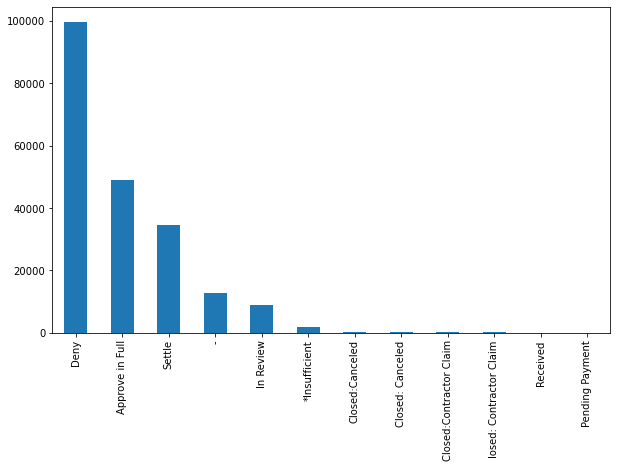

In [65]:
vc.plot(kind = 'bar', figsize = (10,6));

### c. CAS Actions from the SWAT Package on a CASTable Object
CAS actions will always return a CASResults object to the client. CASResults objects are simply a Python dictionary with additional methods and attributes.

In [66]:
ci = claims_raw.columnInfo()

display(type(ci), ci)

[table.columninfo]
    table.caslib = 'casuser'
    table.name = 'tsa_claims_raw'



swat.cas.results.CASResults

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Claim_Number,,1,varchar,13,13,,0,0
1,Date_Received,,2,double,8,12,MMDDYY,10,0
2,Incident_Date,,3,double,8,12,MMDDYY,10,0
3,Airport_Code,,4,varchar,3,3,,0,0
4,Airport_Name,,5,varchar,48,48,,0,0
5,Claim_Type,,6,varchar,39,39,,0,0
6,Claim_Site,,7,varchar,15,15,,0,0
7,Item_Category,,8,varchar,834,834,,0,0
8,Close_Amount,,9,double,8,20,DOLLAR,20,2
9,Disposition,,10,varchar,23,23,,0,0


Find the keys in the CASResults object.

In [67]:
ci.keys()

odict_keys(['ColumnInfo'])

Call the *ColumnInfo* key to return the object. Then view the object type from the *ColumnInfo* key.

In [68]:
df = ci['ColumnInfo']

display(type(df), df)

swat.dataframe.SASDataFrame

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,Claim_Number,,1,varchar,13,13,,0,0
1,Date_Received,,2,double,8,12,MMDDYY,10,0
2,Incident_Date,,3,double,8,12,MMDDYY,10,0
3,Airport_Code,,4,varchar,3,3,,0,0
4,Airport_Name,,5,varchar,48,48,,0,0
5,Claim_Type,,6,varchar,39,39,,0,0
6,Claim_Site,,7,varchar,15,15,,0,0
7,Item_Category,,8,varchar,834,834,,0,0
8,Close_Amount,,9,double,8,20,DOLLAR,20,2
9,Disposition,,10,varchar,23,23,,0,0


SASDataFrames work like pandas DataFrames. Here use traditional Pandas to query the SASDataFrame.

In [69]:
(df
 .query("Type == 'varchar'")
 .loc[:,['Column','Type']]
)

,Column,Type
0,Claim_Number,varchar
3,Airport_Code,varchar
4,Airport_Name,varchar
5,Claim_Type,varchar
6,Claim_Site,varchar
7,Item_Category,varchar
9,Disposition,varchar
10,StateName,varchar
11,State,varchar
12,County,varchar


Turn off the tracing options.

In [70]:
swat.options.cas.trace_actions = False
swat.options.cas.trace_ui_actions = False

## 7. Explore the CAS Table Columns

### a. View the Number of Missing Values in a CAS Table Using the Pandas API in the SWAT Package

The SWAT nmiss method returns a Series to the client as expected.

In [71]:
nmiss_ser = claims_raw.nmiss()

display(type(nmiss_ser), nmiss_ser)

pandas.core.series.Series

Claim_Number         0
Date_Received      260
Incident_Date     2329
Airport_Code      8519
Airport_Name      8519
Claim_Type        7908
Claim_Site         735
Item_Category     3961
Close_Amount     33746
Disposition      13784
StateName        11673
State            11673
County           13414
City             11673
dtype: int64

Use Pandas on the client to plot the summarized results returned from the CAS server.

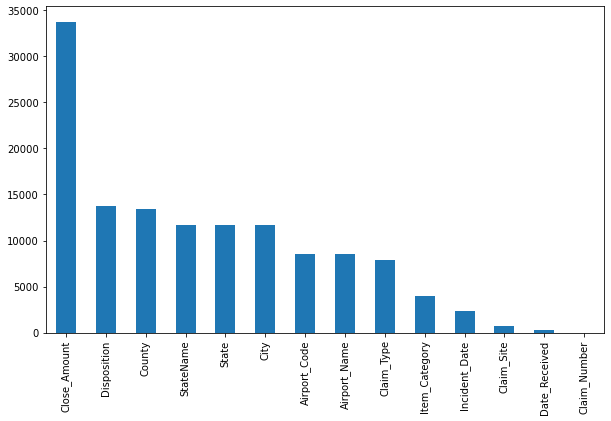

In [72]:
(nmiss_ser                          ## Pandas Series
 .sort_values(ascending=False)      ## Sort the pandas Series object returned from the CAS server on the client
 .plot(kind='bar', figsize=(10,6))  ## Plot the Series on the client
);

### b. View the Distinct Values in a CAS Table Using the Pandas API in the SWAT Package

In [73]:
(claims_raw                ## CAS table 
 .Claim_Type               ## CAS table column
 .nunique(dropna=False)    ## Use the Pandas API in the SWAT package to find the number of unique values
)

18

Create a list of the unique values in a CAS table column.

In [74]:
(claims_raw    ## CAS table
 .Claim_Type   ## CAS table column
 .unique()     ## Use the Pandas API in the SWAT package to find the unique values in a CAS table column
 .tolist()     ## Modify the results from the CAS server on the client to create a list of the unique values
)

['',
 '-',
 'Bus Terminal',
 'Complaint',
 'Compliment',
 'Employee Loss (MPCECA)',
 'Missed Flight',
 'Motor Vehicle',
 'Not Provided',
 'Passenger Property Loss',
 'Passenger Property Loss/Personal Injur',
 'Passenger Property Loss/Personal Injury',
 'Passenger Theft',
 'Personal Injury',
 'Property Damage',
 'Property Damage/Personal Injury',
 'Property Loss',
 'Wrongful Death']

### c. View the Number of Distinct and Missing Values Using a CAS Action

Execute the distinct CAS action and store the results.

In [75]:
cr = claims_raw.distinct()

display(type(cr), cr)

swat.cas.results.CASResults

,Column,NDistinct,NMiss,Trunc
0,Claim_Number,220828.0,0.0,0.0
1,Date_Received,4677.0,260.0,0.0
2,Incident_Date,5739.0,2329.0,0.0
3,Airport_Code,471.0,8519.0,0.0
4,Airport_Name,477.0,8519.0,0.0
5,Claim_Type,18.0,7908.0,0.0
6,Claim_Site,9.0,735.0,0.0
7,Item_Category,4919.0,3961.0,0.0
8,Close_Amount,21490.0,33746.0,0.0
9,Disposition,13.0,13784.0,0.0


Store the SASDataFrame from the distinct action CASResults object and view it's type and value.

In [76]:
distinct_df = cr['Distinct']

display(type(distinct_df), distinct_df)

swat.dataframe.SASDataFrame

,Column,NDistinct,NMiss,Trunc
0,Claim_Number,220828.0,0.0,0.0
1,Date_Received,4677.0,260.0,0.0
2,Incident_Date,5739.0,2329.0,0.0
3,Airport_Code,471.0,8519.0,0.0
4,Airport_Name,477.0,8519.0,0.0
5,Claim_Type,18.0,7908.0,0.0
6,Claim_Site,9.0,735.0,0.0
7,Item_Category,4919.0,3961.0,0.0
8,Close_Amount,21490.0,33746.0,0.0
9,Disposition,13.0,13784.0,0.0


Once you have the SASDataFrame, work with it like a Pandas DataFrame. Using traditional Pandas create a column with the percentage of distinct values in each column.

In [77]:
## Find the total number of rows in the CAS table using the CAS server
numRows = claims_raw.shape[0]

## Use Pandas on the client to create a column and plot the values
(distinct_df
 .assign(pctDistinct = distinct_df['NDistinct'] / numRows)
 .sort_values('pctDistinct', ascending=False)                         
)

,Column,NDistinct,NMiss,Trunc,pctDistinct
0,Claim_Number,220828.0,0.0,0.0,0.999878
8,Close_Amount,21490.0,33746.0,0.0,0.097304
2,Incident_Date,5739.0,2329.0,0.0,0.025985
7,Item_Category,4919.0,3961.0,0.0,0.022273
1,Date_Received,4677.0,260.0,0.0,0.021177
4,Airport_Name,477.0,8519.0,0.0,0.002160
3,Airport_Code,471.0,8519.0,0.0,0.002133
13,City,432.0,11673.0,0.0,0.001956
12,County,384.0,13414.0,0.0,0.001739
10,StateName,57.0,11673.0,0.0,0.000258


### d. Explore Categorical Columns

#### Use the value_counts Pandas API Method from the SWAT Package

View the frequency values in the **Claim_Site** column.

In [78]:
sites_ser = (claims_raw                                         ## CAS table 
             .Claim_Site                                        ## CAS table column
             .value_counts(normalize = True, dropna = False)    ## SWAT method Pandas API to process the data in CAS. The CAS server then returns a Series to the client
             )

sites_ser

Checked Baggage    0.776546
Checkpoint         0.202613
Other              0.013185
                   0.003328
Motor Vehicle      0.002445
-                  0.001752
Bus Station        0.000091
Pre-Check          0.000036
Not Provided       0.000005
dtype: float64

Use Pandas to visualize the Series returned from the CAS server.

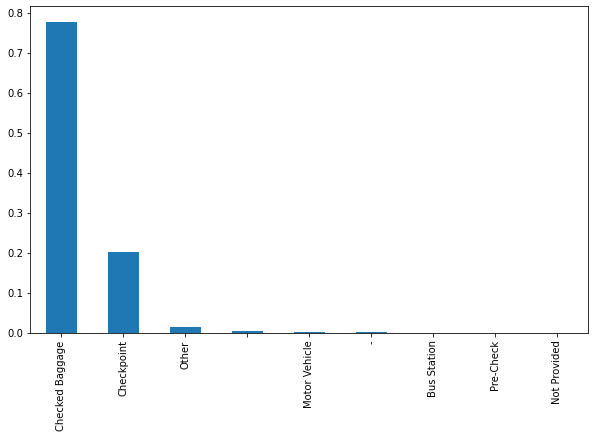

In [79]:
sites_ser.plot(kind='bar', figsize=(10,6));

#### Use CAS Actions to Explore Categorical Columns
You can also use CAS actions to achieve similar results.

##### simple.freq action

In [80]:
## Columns to analyze
colNames = ['Claim_Type', 'Claim_Site', 'Disposition', 'StateName', 'State']

## The freq action generates a frequency distribution for one or more columns
cr = claims_raw.freq(inputs = colNames, 
                     includeMissing = True)

## Display the results
display(type(cr), cr)

swat.cas.results.CASResults

,Column,CharVar,FmtVar,Level,Frequency
0,Claim_Type,,,1,7908.0
1,Claim_Type,-,-,2,375.0
2,Claim_Type,Bus Terminal,Bus Terminal,3,1.0
3,Claim_Type,Complaint,Complaint,4,73.0
4,Claim_Type,Compliment,Compliment,5,3.0
...,...,...,...,...,...
149,State,VT,VT,53,338.0
150,State,WA,WA,54,6953.0
151,State,WI,WI,55,1527.0
152,State,WV,WV,56,137.0


Access the SASDataFrame in the CASResults object.

In [81]:
freq_df = cr['Frequency']
freq_df.head(50)

,Column,CharVar,FmtVar,Level,Frequency
0,Claim_Type,,,1,7908.0
1,Claim_Type,-,-,2,375.0
2,Claim_Type,Bus Terminal,Bus Terminal,3,1.0
3,Claim_Type,Complaint,Complaint,4,73.0
4,Claim_Type,Compliment,Compliment,5,3.0
5,Claim_Type,Employee Loss (MPCECA),Employee Loss (MPCECA),6,492.0
6,Claim_Type,Missed Flight,Missed Flight,7,32.0
7,Claim_Type,Motor Vehicle,Motor Vehicle,8,423.0
8,Claim_Type,Not Provided,Not Provided,9,2.0
9,Claim_Type,Passenger Property Loss,Passenger Property Loss,10,126795.0


##### freqTab.freqTab action

Load a CAS action set.

In [82]:
conn.loadActionSet('freqTab')

NOTE: Added action set 'freqTab'.


[actionset]

 'freqTab'

+ Elapsed: 0.0163s, user: 0.00427s, sys: 0.0391s, mem: 1.14mb

Execute the freqTab action for a one way frequency of each column specified.

In [83]:
cr = claims_raw.freqTab(tabulate = colNames, 
                        order = 'FREQ',
                        includeMissing = True)
cr

[LevelInfo]

 Variable Level Information
 
       Variable  Levels                                                                                                                                                                                                                                                                                                                                                                                                           Values
 0   Claim_Site       9                                                                                                                                                                                                                                                                                                                              Checked Baggage Checkpoint Other Motor Vehicle - Bus Station Pre-Check Not Provided
 1   Claim_Type      18                                                                                          Passenger Property Loss Property Damage Personal Injury Employee Loss (MPCECA) Passenger Theft Motor Vehicle - Complaint Missed Flight Property Loss Property Damage/Personal Injury Passenger Property Loss/Personal Injury Passenger Property Loss/Personal Injur Wrongful Death Compliment Not Provided Bus Terminal
 2  Disposition      13                                                                                                                                                                                                                                                  Deny Approve in Full Settle - In Review *Insufficient Closed:Canceled Closed: Canceled Closed:Contractor Claim losed: Contractor Claim Received Pending Payment
 3        State      57                                                                                                                                                                                                                                          FL CA NY TX IL NJ GA WA PA AZ NV DC CO MA HI MI NC MN MD OH OR TN LA MO VA KY PR AK UT WI SC IN CT NM OK NE AL RI NH MT ID AR IA MS VI ME KS VT SD ND WY WV GU CQ DE AS
 4    StateName      57    FLORIDA CALIFORNIA NEW YORK TEXAS ILLINOIS NEW JERSEY GEORGIA WASHINGTON PENNSYLVANIA ARIZONA NEVADA DIST. OF COLUMBIA COLORADO MASSACHUSETTS HAWAII MICHIGAN NORTH CAROLINA MINNESOTA MARYLAND OHIO OREGON TENNESSEE LOUISIANA MISSOURI VIRGINIA KENTUCKY PUERTO RICO ALASKA UTAH WISCONSIN SOUTH CAROLINA INDIANA CONNECTICUT NEW MEXICO OKLAHOMA NEBRASKA ALABAMA RHODE ISLAND NEW HAMPSHIRE MONTANA ID...

[NObs]

 Number of Observations
 
       RowId                  Description     Value
 0     NREAD  Number of Observations Read  220855.0
 1     NUSED  Number of Observations Used  220855.0
 2  NWEIGHTS               Sum of Weights  220855.0

[Table1.OneWayFreqs]

 Claim_Type
 
                                F_Claim_Type                               Claim_Type  Frequency    Percent  CumFrequency  CumPercent
 0                                                                                        7908.0   3.580630        7908.0    3.580630
 1                   Passenger Property Loss                  Passenger Property Loss   126795.0  57.410971      134703.0   60.991601
 2                           Property Damage                          Property Damage    82603.0  37.401462      217306.0   98.393063
 3                           Personal Injury                          Personal Injury     1613.0   0.730343      218919.0   99.123407
 4                    Employee Loss (MPCECA)                   Employee Loss (MPCECA)      492.0   0.222771      219411.0   99.346177
 5                           Passenger Theft                          Passenger Theft      479.0   0.216884      219890.0   99.563062
 6                             Motor Vehicle                            Motor Vehicle      423.0   0.191528      220313.0   99.754590
 7                                         -           

View the keys in the CASResults object from the freqTab CAS action.

In [84]:
cr.keys()

odict_keys(['LevelInfo', 'NObs', 'Table1.OneWayFreqs', 'Table2.OneWayFreqs', 'Table3.OneWayFreqs', 'Table4.OneWayFreqs', 'Table5.OneWayFreqs', 'Timing'])

Plot the **Claim_Type** one way frequency table using Pandas.

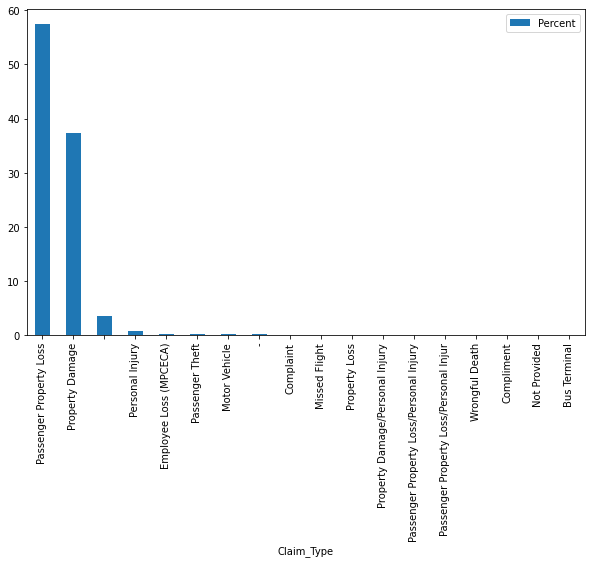

In [85]:
(cr['Table1.OneWayFreqs']                                                   ## SASDataFrame
 .sort_values('Percent', ascending = False)                                 ## Pandas sort_values
 .plot(kind = 'bar', x = 'Claim_Type', y = 'Percent', figsize = (10,6))     ## Pandas plot
);

Explore the years of the **Date_Received** and **Incident_Date** values to determine the accuracy of the raw data. Use the CASColumn.dt to access the values of a CAS table column as datetime-like properties.

In [86]:
(claims_raw                    ## CAS table     
 .Date_Received                ## CAS column
 .dt                           ## Access datetime column methods in the SWAT package
 .year                         ## Get the year of the date value
 .value_counts(dropna=False)   ## Use the SWAT package value_counts Pandas API method to return a Series to the client
 .sort_index()                 ## Sort the Pandas Series index
)

2002.0     1054
2003.0    22474
2004.0    29778
2005.0    24539
2006.0    19091
2007.0    18670
2008.0    16439
2009.0    12803
2010.0    10925
2011.0    10905
2012.0    10069
2013.0     9698
2014.0     8855
2015.0     8667
2016.0     7973
2017.0     8618
2020.0        1
2025.0        5
2040.0        1
2044.0        1
2055.0        1
2094.0        1
2200.0        1
2204.0        7
2205.0        4
2206.0        2
2207.0        1
2208.0        1
2500.0        2
2900.0        1
2907.0        1
2996.0        1
3004.0        1
3005.0        5
NaN         260
dtype: int64

In [87]:
(claims_raw                    ## CAS table     
 .Incident_Date                ## CAS column
 .dt                           ## Access datetime column methods in the SWAT package
 .year                         ## Get the year of the date value
 .value_counts(dropna=False)   ## Use the SWAT package value_counts Pandas API method to return a Series to the client
 .sort_index()                 ## Sort the Pandas Series index
)

1996.0        1
2000.0       14
2001.0       15
2002.0     2158
2003.0    24508
2004.0    28960
2005.0    22971
2006.0    18806
2007.0    18275
2008.0    15902
2009.0    11179
2010.0    12215
2011.0    10995
2012.0     9997
2013.0     9536
2014.0     8680
2015.0     7721
2016.0     8188
2017.0     8403
2018.0        2
NaN        2329
dtype: int64

## 8. Explore Numeric Columns

### a. Descriptive Statistics Using the Pandas API in the SWAT Package

In [88]:
claims_raw.describe()

,Date_Received,Incident_Date,Close_Amount
count,220595.000000,218526.000000,187109.000000
mean,17805.315483,17759.671268,94.591258
std,2863.518984,1540.697687,808.329142
min,15344.000000,13277.000000,0.000000
25%,16457.000000,16427.000000,0.000000
50%,17421.000000,17404.000000,0.000000
75%,18946.000000,18922.000000,68.950000
max,381978.000000,21194.000000,250000.000000


Create new numeric columns in the CAS table to explore.

In [89]:
## Difference of days between the incident date and the date the claim was filed
claims_raw.eval('DateDiff =  Date_Received - Incident_Date')

## Create a column that pulls the year of Incident_Date
claims_raw.eval('Incident_Year = year(Incident_Date)')

## Create a column that pulls the year of Date_Received
claims_raw.eval('Received_Year = year(Date_Received)')

The eval method adds a variety of parameters to the CASTable object to create the calculated columns. The columns are created when an action or method is executed on the CASTable object.

In [90]:
claims_raw

CASTable('tsa_claims_raw', caslib='casuser', computedvars=['DateDiff', 'Incident_Year', 'Received_Year'], computedvarsprogram='DateDiff =   Date_Received - Incident_Date; DateDiff = DateDiff; Incident_Year =  year(Incident_Date); Incident_Year = Incident_Year; Received_Year =  year(Date_Received); Received_Year = Received_Year; ')[['Claim_Number', 'Date_Received', 'Incident_Date', 'Airport_Code', 'Airport_Name', 'Claim_Type', 'Claim_Site', 'Item_Category', 'Close_Amount', 'Disposition', 'StateName', 'State', 'County', 'City', 'DateDiff', 'Incident_Year', 'Received_Year']]

In [91]:
claims_raw.params

{'name': 'tsa_claims_raw',
 'caslib': 'casuser',
 'computedvars': ['DateDiff', 'Incident_Year', 'Received_Year'],
 'computedvarsprogram': 'DateDiff =   Date_Received - Incident_Date; DateDiff = DateDiff; Incident_Year =  year(Incident_Date); Incident_Year = Incident_Year; Received_Year =  year(Date_Received); Received_Year = Received_Year; '}

In [92]:
claims_raw.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition,StateName,State,County,City,DateDiff,Incident_Year,Received_Year
0,2006081611123,2006-08-14,2006-07-24,,,Passenger Property Loss,Checked Baggage,"Candles - Decorative and other; Clothing - Shoes, belts, accessories, etc.; Dishes, Pottery, Glassware, Plasticware",NaN,,,,,,21.0,2006.0,2006.0
1,2006062108380,2006-06-20,2006-06-05,,,Passenger Property Loss,Checkpoint,Jewelry - Fine,NaN,,,,,,15.0,2006.0,2006.0
2,2006062008258,2006-06-20,2006-05-17,,,Passenger Property Loss,Checked Baggage,"Cosmetics - Perfume, toilet articles, medicines, soaps, etc.; Medicines",NaN,,,,,,34.0,2006.0,2006.0
3,2006010699056,2006-01-30,2005-12-23,,,Passenger Property Loss,Checked Baggage,Other,NaN,,,,,,38.0,2005.0,2006.0
4,2006032303625,2006-03-20,2006-03-01,,,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,,,,,,19.0,2006.0,2006.0


View descriptive statistics of the calculated columns.

In [93]:
colNames = ['DateDiff','Incident_Year', 'Received_Year']

claims_raw[colNames].describe()

,DateDiff,Incident_Year,Received_Year
count,218385.000000,218526.000000,220595.000000
mean,61.896268,2008.124393,2008.254734
std,2439.086918,4.227491,7.836414
min,-1826.000000,1996.000000,2002.000000
25%,11.416667,2004.000000,2005.000000
50%,23.000000,2007.000000,2007.000000
75%,44.000000,2011.000000,2011.000000
max,365329.000000,2018.000000,3005.000000


**NOTE: Notice the following:**
- The minimum **DateDiff** value is -1,826 and the maximum is 365,229
- The minimum **Incident_Year** value is 1996 and the maximum is 2018
- The maximum **Received_Year** value is 3005

### b. Descriptive Statistics Using CAS Actions

The claims_raw CASTable object still contains the additional parameters to create the new columns.

In [94]:
claims_raw

CASTable('tsa_claims_raw', caslib='casuser', computedvars=['DateDiff', 'Incident_Year', 'Received_Year'], computedvarsprogram='DateDiff =   Date_Received - Incident_Date; DateDiff = DateDiff; Incident_Year =  year(Incident_Date); Incident_Year = Incident_Year; Received_Year =  year(Date_Received); Received_Year = Received_Year; ')[['Claim_Number', 'Date_Received', 'Incident_Date', 'Airport_Code', 'Airport_Name', 'Claim_Type', 'Claim_Site', 'Item_Category', 'Close_Amount', 'Disposition', 'StateName', 'State', 'County', 'City', 'DateDiff', 'Incident_Year', 'Received_Year']]

Use the summary action to view descriptive statistics of the calculated columns.

In [95]:
claims_raw.summary(inputs = colNames, 
                   subSet = ['MIN','MAX','N','NMISS'])

,Column,Min,Max,N,NMiss
0,DateDiff,-1826.0,365329.0,218385.0,2470.0
1,Incident_Year,1996.0,2018.0,218526.0,2329.0
2,Received_Year,2002.0,3005.0,220595.0,260.0


## 9. Remove Duplicate Rows

In [96]:
conn.loadActionSet('deduplication')

NOTE: Added action set 'deduplication'.


[actionset]

 'deduplication'

+ Elapsed: 0.0144s, user: 0.0117s, sys: 0.0134s, mem: 1.09mb

In [97]:
claims_dups = conn.CASTable('tsa_claims_raw', caslib = ds_caslib)
claims_dups

CASTable('tsa_claims_raw', caslib='casuser')

Get a list of all column names.

In [98]:
colNames = claims_dups.columns.to_list()
colNames

['Claim_Number',
 'Date_Received',
 'Incident_Date',
 'Airport_Code',
 'Airport_Name',
 'Claim_Type',
 'Claim_Site',
 'Item_Category',
 'Close_Amount',
 'Disposition',
 'StateName',
 'State',
 'County',
 'City']

Add the groupby parameter to the CASTable object to determine which columns to use to find duplicate rows. Here will are looking for rows that are exactly the same by specifying all columns in the groupby parameter.

In [99]:
claims_dups.groupby = colNames
claims_dups.params

{'name': 'tsa_claims_raw',
 'caslib': 'casuser',
 'groupby': ['Claim_Number',
  'Date_Received',
  'Incident_Date',
  'Airport_Code',
  'Airport_Name',
  'Claim_Type',
  'Claim_Site',
  'Item_Category',
  'Close_Amount',
  'Disposition',
  'StateName',
  'State',
  'County',
  'City']}

Use the deduplicate CAS action to remove entirely duplicate rows from the CAS table. 

In [100]:
claims_dups.deduplicate(casOut = 'claims_no_dup',             ## CAS table with no duplciate rows
                        duplicateOut = 'duplicate_claims',    ## CAS table with extra duplicate rows
                        noDupKey = True)                      ## When set to True, eliminates rows that have duplicate group-by variable values.

NOTE: There were 220855 rows read from the table TSA_CLAIMS_RAW.
NOTE: The table claims_no_dup has 220850 rows and 14 columns.
NOTE: The table duplicate_claims has 5 rows and 14 columns.


+ Elapsed: 0.382s, user: 2.51s, sys: 1.43s, mem: 1.03e+03mb

In [101]:
conn.tableInfo(caslib = ds_caslib)

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TSA_CLAIMS_BAD,220855,14,0,utf-8,2023-01-16T13:15:09+00:00,2023-01-16T13:15:09+00:00,2023-01-16T13:15:28+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,tsa_claims_raw.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-16T13:13:53+00:00,1.989494e+09
1,TSA_CLAIMS_RAW,220855,14,0,utf-8,2023-01-16T13:15:29+00:00,2023-01-16T13:15:29+00:00,2023-01-16T13:16:09+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,tsa_claims_raw.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-16T13:13:53+00:00,1.989494e+09
2,CLAIMS_NO_DUP,220850,14,0,utf-8,2023-01-16T13:16:09+00:00,2023-01-16T13:16:09+00:00,2023-01-16T13:16:09+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
3,DUPLICATE_CLAIMS,5,14,0,utf-8,2023-01-16T13:16:09+00:00,2023-01-16T13:16:09+00:00,2023-01-16T13:16:09+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


## 10. Create The Final CAS Table

**REQUIREMENTS:**
1. **State**
    - Values should be in upper case
2. **StateName**
    - Values should be in proper case
3. **Claim_Site** 
    - Change missing values, *Not Provided* and "-" to *Unknown*
4. **Disposition**
    - Change missing values, *Not Provided* and "-" to *Unknown*
    - Change the *Closed: Canceled* and *losed: Contractor Claim* values to *Closed:Contractor Claim*.
4. **Claim_Type**
    - Change missing values, *Not Provided* and "-" to *Unknown*.
    - Fix typos in the raw values
    - Change *Passenger Property Loss/Injury* and *Property Loss* values to *Passenger Property Loss*.
    - Change *Property Damage/Personal Injury* values to *Property Damage*.
5. Create a new column named **Date_Issues** with a value of *Needs Review* to indicate that a row has a date issue. Date issues consist of the following:
    - a missing value for **Incident_Date** or **Date_Received**
    - an **Incident_Date** or **Date_Received** value out of the predefined year range of *2002* through *2017*
    - an **Incident_Date** value that occurs after the **Date_Received** value
6. Create the **DateDiff** column to identify how long the claim took to be received:
    - Formula: **Date_Received** - **Incident_Date**
7. Create the **Incident_Year** and **Received_Year** columns

Reference the deduplicated CAS table.

In [102]:
claims_prep = conn.CASTable('CLAIMS_NO_DUP', caslib=ds_caslib)
claims_prep

CASTable('CLAIMS_NO_DUP', caslib='casuser')

In [103]:
claims_prep.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition,StateName,State,County,City
0,0105204M,2004-01-05,2003-12-11,RSW,Southwest Florida International,Passenger Property Loss,Other,Other,NaN,,FLORIDA,FL,LEE,FORT MYERS
1,0105366M,2004-01-05,2003-11-26,SEA,Seattle-Tacoma International,,Checked Baggage,Currency,150.00,Settle,WASHINGTON,WA,KING,SEATTLE
2,0105404M,2004-01-05,2003-12-09,FLL,Ft. Lauderdale-Hollywood International,Property Damage,Checkpoint,"Clothing - Shoes, belts, accessories, etc.",222.65,Settle,FLORIDA,FL,BROWARD,FORT LAUDERDALE
3,0105518M,2004-01-05,2003-12-11,BOS,Boston (Logan) International Airport,Passenger Property Loss,Checked Baggage,Cell Phones,0.00,,MASSACHUSETTS,MA,SUFFOLK,BOSTON
4,0107012M,2004-01-07,2003-12-22,DFW,Dallas-Fort Worth International Airport,Passenger Property Loss,Checked Baggage,"Clothing - Shoes, belts, accessories, etc.",178.00,Approve in Full,TEXAS,TX,TARRANT,DALLAS-FORT WORTH


### a. Update Rows in the CAS Table
- Modifying columns using this method requires using [SAS functions](https://go.documentation.sas.com/doc/en/pgmsascdc/v_029/lefunctionsref/titlepage.htm).
- You cannot update rows in place and create calculated columns in the same step.


In [104]:
##
## UPDATE COLUMNS
##


## State
upcaseState = 'upcase(State)'


## StateName
propcaseStateName = 'propcase(StateName)'


## Claim_Site
fixClaim_Site = '''ifc(Claim_Site in ('-','','Not Provided'),
                       'Unknown',
                        Claim_Site)'''

## Disposition
fixDisposition = '''ifc(Disposition in ('-','','Not Provided'), 'Unknown',
                    ifc(Disposition = 'Closed: Canceled', 'Closed:Canceled',
                    ifc(Disposition = 'losed: Contractor Claim', 'Closed:Contractor Claim',
                        Disposition)))
                    '''

## Claim_Type
fixClaim_Type = '''ifc(Claim_Type in ('-','','Not Provided'), 'Unknown',
                   ifc(Claim_Type in ('Passenger Property Loss/Personal Injur','Passenger Property Loss/Personal Injury','Property Loss'), 'Passenger Property Loss',
                   ifc(Claim_Type = 'Property Damage/Personal Injury', 'Property Damage',
                       Claim_Type)))
                '''


## Use the update action to update rows in a CAS table
(claims_prep
 .update(set = [
            {'var':'State', 'value':upcaseState},
            {'var':'StateName', 'value':propcaseStateName},
            {'var':'Claim_Site', 'value':fixClaim_Site},
            {'var':'Disposition', 'value':fixDisposition},
            {'var':'Claim_Type', 'value':fixClaim_Type}
         ])
)

[rowsUpdated]

 220850

[tableName]

 'CLAIMS_NO_DUP'

+ Elapsed: 0.196s, user: 1.7s, sys: 0.607s, mem: 225mb

Check the unique values of the updated columns to confirm they were updated correctly.

In [105]:
colNames = ['State', 'StateName', 'Claim_Site', 'Disposition', 'Claim_Type']

## View the unique values in the updated columns
for col in colNames:
    uniqueValues = claims_prep[col].unique()    ## Get unique values from the CAS server and return them to the client
    print(f'{col} : {uniqueValues}\n')

State : ['' 'AK' 'AL' 'AR' 'AS' 'AZ' 'CA' 'CO' 'CQ' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU'
 'HI' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO'
 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA'
 'PR' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']

StateName : ['' 'Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Dist. Of Columbia' 'Florida'
 'Georgia' 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'N Mariana Islands'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']

Claim_Sit

### b. Create the Final CAS Table with the Calculated Columns
The eval method creates new columns in a CAS table. You cannot use the eval method to update a column in place. 

In [106]:
##
## CREATE NEW COLUMNS
##

## Date_Issues
createDateIssues = '''Date_Issues = ifc(Incident_Date > Date_Received or 
                                        Incident_Date = . or 
                                        Date_Received = . or 
                                        Year(Incident_Date) < 2002 or
                                        Year(Incident_Date) > 2017 or
                                        Year(Date_Received) < 2002 or
                                        Year(Date_Received) > 2017,                                     
                                    'Needs Review', 
                                    'Valid Date')'''

## DateDiff
createDateDiff = "DateDiff =  Date_Received - Incident_Date"

## Received_Year as a character year
createYearReceived = "Received_Year = year(Date_Received)"

## Year_Claim as a character year
createYearClaim = "Incident_Year = year(Incident_Date)"


##
## Create the CAS table
##
(claims_prep                                      ## Specify the CLAIMS_NO_DUP CAS table
 .eval(createDateIssues, inplace=False)           ## Create the Date_Issues column. Inplace=False returns a CASTable object
 .eval(createDateDiff, inplace=False)             ## Create the DateDiff column to find the difference in days between the incident date and date received
 .eval(createYearReceived, inplace=False)         ## Create a column that indicates the year the claim was received
 .eval(createYearClaim, inplace=False)            ## Create a column that indicates the year the incident occurred
 .copyTable(casOut={'name':'tsa_claims_final',    ## Create new CAS table using the CLAIMS_NO_DUP data with the updated data and new calculated columns
                    'caslib':ds_caslib, 
                    'replace':True})
)

[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'TSA_CLAIMS_FINAL'

[casTable]

 CASTable('TSA_CLAIMS_FINAL', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.166s, user: 0.628s, sys: 0.769s, mem: 770mb

In [107]:
conn.tableInfo(caslib = ds_caslib)

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TSA_CLAIMS_BAD,220855,14,0,utf-8,2023-01-16T13:15:09+00:00,2023-01-16T13:15:09+00:00,2023-01-16T13:15:28+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,tsa_claims_raw.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-16T13:13:53+00:00,1.989494e+09
1,TSA_CLAIMS_RAW,220855,14,0,utf-8,2023-01-16T13:15:29+00:00,2023-01-16T13:15:29+00:00,2023-01-16T13:16:09+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,tsa_claims_raw.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-16T13:13:53+00:00,1.989494e+09
2,CLAIMS_NO_DUP,220850,14,0,utf-8,2023-01-16T13:16:09+00:00,2023-01-16T13:16:11+00:00,2023-01-16T13:16:12+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,Peter.Styliadis@sas.com,,NaN
3,DUPLICATE_CLAIMS,5,14,0,utf-8,2023-01-16T13:16:09+00:00,2023-01-16T13:16:09+00:00,2023-01-16T13:16:09+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
4,TSA_CLAIMS_FINAL,220850,18,0,utf-8,2023-01-16T13:16:12+00:00,2023-01-16T13:16:12+00:00,2023-01-16T13:16:12+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


Preview the new CAS table.

In [108]:
claims_final = conn.CASTable('tsa_claims_final', caslib = ds_caslib)
claims_final.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition,StateName,State,County,City,Date_Issues,DateDiff,Received_Year,Incident_Year
0,0105204M,2004-01-05,2003-12-11,RSW,Southwest Florida International,Passenger Property Loss,Other,Other,NaN,Unknown,Florida,FL,LEE,FORT MYERS,Valid Date,25.0,2004.0,2003.0
1,0105366M,2004-01-05,2003-11-26,SEA,Seattle-Tacoma International,Unknown,Checked Baggage,Currency,150.00,Settle,Washington,WA,KING,SEATTLE,Valid Date,40.0,2004.0,2003.0
2,0105404M,2004-01-05,2003-12-09,FLL,Ft. Lauderdale-Hollywood International,Property Damage,Checkpoint,"Clothing - Shoes, belts, accessories, etc.",222.65,Settle,Florida,FL,BROWARD,FORT LAUDERDALE,Valid Date,27.0,2004.0,2003.0
3,0105518M,2004-01-05,2003-12-11,BOS,Boston (Logan) International Airport,Passenger Property Loss,Checked Baggage,Cell Phones,0.00,Unknown,Massachusetts,MA,SUFFOLK,BOSTON,Valid Date,25.0,2004.0,2003.0
4,0107012M,2004-01-07,2003-12-22,DFW,Dallas-Fort Worth International Airport,Passenger Property Loss,Checked Baggage,"Clothing - Shoes, belts, accessories, etc.",178.00,Approve in Full,Texas,TX,TARRANT,DALLAS-FORT WORTH,Valid Date,16.0,2004.0,2003.0


Confirm the valid date rows by viewing the unique values in the received and incident years.

In [109]:
## View the unique values in the year columns
colNames = ['Received_Year','Incident_Year']

for col in colNames:
    uniqueYears = (claims_final                            ## Specify the CAS table
                   .query('Date_Issues = "Valid Date"')    ## Query rows in the CAS table
                   .loc[:,col]                             ## Select the CAS table column
                   .unique()                               ## Return unique values of the CAS table column to the client
                   .tolist())                              ## Create a list of the returned values
    print(f'{col}:{uniqueYears}\n')

Received_Year:[2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0]

Incident_Year:[2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0]



## 11. Analyzing Data
**NOTE: Expand the cells below the question to view a solution.**

In [110]:
claims_final

CASTable('tsa_claims_final', caslib='casuser')

Where did the claim occur with the max **Close_Amount** value of $250,000?

In [111]:
## Find the max Close_Amount
maxCloseAmt = (claims_final    ## CAS table
               .Close_Amount   ## CAS table column
               .max()          ## max method
              )

## View the row with the max Close_Amount
(claims_final                               ## CAS table
 .query(f'Close_Amount = {maxCloseAmt}')    ## Filter the CAS table
 .head()                                    ## Get a SASDataFrame on the client
)

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition,StateName,State,County,City,Date_Issues,DateDiff,Received_Year,Incident_Year
0,0221037L,2003-02-21,2003-01-08,LAS,McCarran International,Passenger Property Loss,Checked Baggage,Other,250000.0,Deny,Nevada,NV,CLARK,LAS VEGAS,Valid Date,44.0,2003.0,2003.0


What airports did the *Wrongful Death* claim types occur?

In [112]:
(claims_final                                ## CAS table
 .query('Claim_Type = "Wrongful Death"')     ## Filter the CAS table
 .head()                                     ## Return a SASDataFrame to the client
)

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Claim_Type,Claim_Site,Item_Category,Close_Amount,Disposition,StateName,State,County,City,Date_Issues,DateDiff,Received_Year,Incident_Year
0,2010061172578,2011-02-02,2010-01-24,ZZX,Non TSA Airport (motor vehicle),Wrongful Death,Motor Vehicle,Other,0.0,Deny,,,,,Valid Date,374.0,2011.0,2010.0
1,2012012690476,2012-02-15,2011-09-17,JAN,Jackson International,Wrongful Death,Other,-,0.0,Deny,Mississippi,MS,RANKIN,JACKSON,Valid Date,151.0,2012.0,2011.0
2,2011081886267,2011-09-23,2010-07-30,HDQ,Headquarters,Wrongful Death,Other,Other,NaN,Unknown,,,,,Valid Date,420.0,2011.0,2010.0
3,2013032702779,2013-01-09,2011-09-17,JAN,Jackson International,Wrongful Death,Other,-,0.0,Deny,Mississippi,MS,RANKIN,JACKSON,Valid Date,480.0,2013.0,2011.0


How many claims had **Date_Issues**?

In [113]:
(claims_final       ## CAS table
 .Date_issues       ## CAS column
 .value_counts()    ## SWAT value counts method
)

Valid Date      216609
Needs Review      4241
dtype: int64

Create a bar chart of how many incidents occurred in each year for claims with valid dates?

**HINT: Use the Incident_Year column**

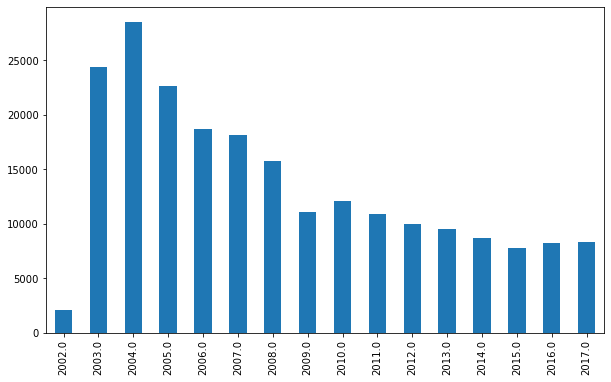

In [114]:
(claims_final                             ## CAS table 
 .query('Date_Issues = "Valid Date"')     ## Query the CAS table
 .Incident_Year                           ## Specify the CAS column
 .value_counts()                          ## Use the value_counts SWAT method to process the data in CAS
 .sort_index()                            ## Sort the Series returned from the CAS server on the client
 .plot(kind='bar', figsize = (10,6))      ## Plot the Pandas Series using Pandas
);

What is the total **Close_Amount** for claims *approved in full* by each **Claim_Site** sorted in descending order?

**HINT: Use the Pandas API groupby method from the SWAT package**

In [115]:
filterBy = 'Approve in Full'

(claims_final                                             ## Specify the CAS table
 .query(f'Disposition = "{filterBy}"')                    ## Query the CAS table
 .groupby('Claim_Site')                                   ## Group the CAS table
 .loc[:,['Close_Amount']]                                 ## Select the CAS table column
 .sum()                                                   ## Summarize the CAS table by the group and sum the Close_Amount
 .sort_values(by = 'Close_Amount', ascending = False)     ## Sort the SASDataFrame returned from the CAS server
)

,Close_Amount
Claim_Site,
Checked Baggage,4082293.95
Checkpoint,3018442.16
Motor Vehicle,326325.41
Other,73242.46
Unknown,7964.75
Pre-Check,871.00
Bus Station,400.00


What are the top 10 airports with the total number of claims *In Review*? Use SQL to solve this question.

**HINT: Load the fedSQL action set and use the execDirect CAS action**

In [116]:
##Load the fedSQL action set
conn.loadActionSet('fedSQL')

## Write your SQL query as a string
query_claimsInReviewAmount = '''
    select Airport_Name, 
           count(*) as Total_Claims_In_Review
        from casuser.tsa_claims_final
        where upcase(Disposition) = 'IN REVIEW'
        group by Airport_Name
        order by Total_Claims_In_Review desc
        limit 10
'''

## Execute your SQL query in CAS and store the results
cr = conn.execDirect(query = query_claimsInReviewAmount)
cr

NOTE: Added action set 'fedSQL'.


,Airport_Name,TOTAL_CLAIMS_IN_REVIEW
0,Los Angeles International Airport,595
1,John F. Kennedy International,540
2,Hartsfield-Jackson Atlanta International Airport,384
3,Orlando International Airport,372
4,Miami International Airport,366
5,Newark International Airport,318
6,McCarran International,270
7,Chicago O'Hare International Airport,262
8,Dallas-Fort Worth International Airport,259
9,Seattle-Tacoma International,251


## 12. Save the CAS Table as a Data Source File (on disk)
Save the CAS table as three different file formats on disk.

In [118]:
claims_final

CASTable('tsa_claims_final', caslib='casuser')

In [119]:
claims_final.save(name = 'claims_final.csv', caslib = ds_caslib)

NOTE: Cloud Analytic Services saved the file claims_final.csv in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'claims_final.csv'

+ Elapsed: 0.496s, user: 1.13s, sys: 0.171s, mem: 54.6mb

In [120]:
claims_final.save(name = 'claims_final.sashdat', caslib = ds_caslib)

NOTE: Cloud Analytic Services saved the file claims_final.sashdat in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'claims_final.sashdat'

+ Elapsed: 0.345s, user: 0.0438s, sys: 0.304s, mem: 113mb

In [121]:
claims_final.save(name = 'claims_final.parquet', caslib = ds_caslib)

NOTE: Cloud Analytic Services saved the file claims_final.parquet in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[name]

 'claims_final.parquet'

+ Elapsed: 0.261s, user: 0.621s, sys: 0.66s, mem: 4.03e+03mb

In [122]:
conn.fileInfo(caslib = ds_caslib)

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2022-08-16T21:25:39+00:00,1.976304e+09
1,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
2,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
3,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
4,-rwxr-xr-x,sas,sas,warranty_claims.parquet,4096,NONE,2022-11-17T13:43:26+00:00,1.984312e+09
5,-rwxr-xr-x,sas,sas,HMEQ_SAS.parquet,4096,NONE,2022-11-17T13:46:56+00:00,1.984312e+09
6,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
7,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,classCopy.sashdat,20904,NONE,2022-12-21T16:59:03+00:00,1.987261e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-01-06T14:29:25+00:00,1.988635e+09


## 13. Understanding CAS Table Scope

View the **Global** attribute of your available CAS tables.

In [123]:
conn.tableInfo(caslib = ds_caslib)

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TSA_CLAIMS_BAD,220855,14,0,utf-8,2023-01-16T13:15:09+00:00,2023-01-16T13:15:09+00:00,2023-01-16T13:15:28+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,tsa_claims_raw.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-16T13:13:53+00:00,1.989494e+09
1,TSA_CLAIMS_RAW,220855,14,0,utf-8,2023-01-16T13:15:29+00:00,2023-01-16T13:15:29+00:00,2023-01-16T13:16:09+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,tsa_claims_raw.csv,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,2023-01-16T13:13:53+00:00,1.989494e+09
2,CLAIMS_NO_DUP,220850,14,0,utf-8,2023-01-16T13:16:09+00:00,2023-01-16T13:16:11+00:00,2023-01-16T13:16:12+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,Peter.Styliadis@sas.com,,NaN
3,DUPLICATE_CLAIMS,5,14,0,utf-8,2023-01-16T13:16:09+00:00,2023-01-16T13:16:09+00:00,2023-01-16T13:16:09+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN
4,TSA_CLAIMS_FINAL,220850,18,0,utf-8,2023-01-16T13:16:12+00:00,2023-01-16T13:16:12+00:00,2023-01-16T13:16:50+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,,,0,Peter.Styliadis@sas.com,,,NaN


In [124]:
display_image('09_a_global_session_tables.png')

The Global attribute indicates the table scope. By default, in-memory tables have the Global attribute set to 0,  which indicates that it's a session-scope table.  A session-scope table is accessible only in the CAS session where it was created,  it's visible only to the user who created it, and it exists only for the duration of the session.  When the CAS session ends, the table is dropped. 

 If you want to share a table with another users or SAS Viya application, you need to promote it. When promoted, the Global attribute is set to 1, indicating that the table has global scope and  is visible across CAS sessions.  If the global-scope table is stored in a caslib that's shared by others, anyone who has access to the global-scope caslib can access the table.  There's only one copy of the table, so the administrator controls user access permissions and locking for concurrent access.   Unlike session-scope tables, global-scope tables aren't dropped from memory when a CAS session ends. The table persists in memory for other sessions, and it will be available in the next CAS session that the user starts.  Lastly, you cannot promote a table to global scope in a session-scope caslib. Remember, a session-scope caslib is disconnected when you terminate your SAS session. Thus, a table cannot be promoted within.


Terminate your CAS session.

In [125]:
conn.terminate()

Reconnect to CAS.

In [ ]:
conn = connect_to_cas()
conn

View available CAS tables. Notice that all the CAS tables were cleared from memory.

In [128]:
conn.tableInfo(caslib = ds_caslib)

NOTE: No tables are available in caslib CASUSER(Peter.Styliadis@sas.com) of Cloud Analytic Services.


+ Elapsed: 0.00949s, user: 0.00659s, sys: 0.0126s, mem: 1.43mb

View available data source files.

In [129]:
conn.fileInfo(caslib = ds_caslib)

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2022-08-16T21:25:39+00:00,1.976304e+09
1,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
2,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
3,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
4,-rwxr-xr-x,sas,sas,warranty_claims.parquet,4096,NONE,2022-11-17T13:43:26+00:00,1.984312e+09
5,-rwxr-xr-x,sas,sas,HMEQ_SAS.parquet,4096,NONE,2022-11-17T13:46:56+00:00,1.984312e+09
6,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
7,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,classCopy.sashdat,20904,NONE,2022-12-21T16:59:03+00:00,1.987261e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-01-06T14:29:25+00:00,1.988635e+09


Load a file into memory as session scope and global scope.

In [130]:
## Load a table as session scope
conn.loadTable(path='claims_final.parquet', caslib = ds_caslib, 
               casOut = {'name':'tsa_claims_session_scope',
                         'caslib':ds_caslib,
                         'replace':True})  

## Load a table as global scope
conn.loadTable(path='claims_final.parquet', caslib = ds_caslib, 
               casOut = {'name':'tsa_claims_final',
                         'caslib':ds_caslib,
                         'promote':True})   ## Promote the CAS table to global scope

## View available CAS tables
conn.tableInfo()

NOTE: Cloud Analytic Services made the file claims_final.parquet available as table TSA_CLAIMS_SESSION_SCOPE in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services made the file claims_final.parquet available as table TSA_CLAIMS_FINAL in caslib CASUSER(Peter.Styliadis@sas.com).


,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TSA_CLAIMS_SESSION_SCOPE,220850,18,0,utf-8,2023-01-16T13:17:50+00:00,2023-01-16T13:17:50+00:00,2023-01-16T13:17:50+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,0,0,0,0,claims_final.parquet,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,,NaN
1,TSA_CLAIMS_FINAL,220850,18,0,utf-8,2023-01-16T13:17:50+00:00,2023-01-16T13:17:50+00:00,2023-01-16T13:17:50+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,1,0,0,0,claims_final.parquet,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,,NaN


Terminate the CAS session and reconnect to CAS.

In [131]:
## Terminate the CAS session
conn.terminate()

## Reconnect to CAS
conn = connect_to_cas()

## View all available CAS tables
conn.tableInfo(caslib = ds_caslib)

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,ModTime,AccessTime,Global,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,TSA_CLAIMS_FINAL,220850,18,0,utf-8,2023-01-16T13:17:50+00:00,2023-01-16T13:17:50+00:00,2023-01-16T13:17:50+00:00,UTF8,1.989494e+09,1.989494e+09,1.989494e+09,1,0,0,0,claims_final.parquet,CASUSER(Peter.Styliadis@sas.com),0,Peter.Styliadis@sas.com,,,NaN


In [132]:
display_image('09_b_global_session_tables.png')

Typically, you will keep a CAS table session scope under these circumstances: 
 You want to load a table for quick ad hoc analysis.
 You want CAS to automatically delete the CAS table when you disconnect from CAS. This conserves resources by not leaving multiple tables in memory when you don't need them.
 Lastly, you don't mind loading the table into memory anytime you need it. The larger the table, the longer it takes to load into memory.

You will want to promote a table to global scope under these circumstances:
 You need to share the table with other users, or even other applications like SAS Visual Analytics.
 You want to avoid loading massive files into memory every time that you need the table.
 You want teams to work with the same CAS table. Remember, every time that you load a file into memory you make a copy of that file from that data source at that exact moment. If your data source is updating behind the scenes, having each user load a table at different times could cause differing results in analysis.


## 14. Use SAS Visual Analytics to Create a Dashboard

Open SAS Visual Analytics and open the TSA_CLAIMS_FINAL CAS table to create a dashboard.

## 15.Terminate the CAS Connection

Function to delete the data source files created in this demonstration.

In [137]:
def delete_demo_data():
    deleteFiles = ['claims_final.csv','claims_final.sashdat','claims_final.parquet']
    deleteTable = 'TSA_CLAIMS_FINAL'
    inputResponse = input(prompt=f'Are you sure you want to delete the: {[file.upper() for file in deleteFiles]} data source files and the {deleteTable} CAS table in the {ds_caslib.upper()} permanently (Y/N)?')
    if inputResponse.upper() == 'Y':
        for table in deleteFiles:
            conn.deleteSource(source = table, caslib = ds_caslib, quiet = True)
        conn.dropTable(name = deleteTable, caslib = ds_caslib, quiet = True)
    else:
        print('No files will be deleted.')
        
delete_demo_data()

Are you sure you want to delete the: ['CLAIMS_FINAL.CSV', 'CLAIMS_FINAL.SASHDAT', 'CLAIMS_FINAL.PARQUET'] data source files and the TSA_CLAIMS_FINAL CAS table in the CASUSER permanently (Y/N)? Y


Confirm everything was deleted.

In [138]:
display(conn.tableInfo(caslib = ds_caslib), 
        conn.fileInfo(caslib = ds_caslib))

NOTE: No tables are available in caslib CASUSER(Peter.Styliadis@sas.com) of Cloud Analytic Services.


+ Elapsed: 0.0106s, user: 0.007s, sys: 0.0121s, mem: 1.43mb

,Permission,Owner,Group,Name,Size,Encryption,Time,ModTime
0,-rwxr-xr-x,sas,sas,cars.sas7bdat,139264,,2022-08-16T21:25:39+00:00,1.976304e+09
1,-rwxr-xr-x,sas,sas,VTI.sashdat,413080,NONE,2022-10-11T13:40:38+00:00,1.981115e+09
2,-rwxr-xr-x,sas,sas,hmeq.sashdat,630384,NONE,2022-10-13T17:56:59+00:00,1.981303e+09
3,-rwxr-xr-x,sas,sas,tsa_claims_raw.csv,34936205,,2023-01-16T13:13:53+00:00,1.989494e+09
4,-rwxr-xr-x,sas,sas,warranty_claims.parquet,4096,NONE,2022-11-17T13:43:26+00:00,1.984312e+09
5,-rwxr-xr-x,sas,sas,HMEQ_SAS.parquet,4096,NONE,2022-11-17T13:46:56+00:00,1.984312e+09
6,-rwxr-xr-x,sas,sas,cars.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
7,-rwxr-xr-x,sas,sas,WARRANTY_CLAIMS.parquet,4096,NONE,2022-11-17T14:19:19+00:00,1.984314e+09
8,-rwxr-xr-x,sas,sas,classCopy.sashdat,20904,NONE,2022-12-21T16:59:03+00:00,1.987261e+09
9,-rwxr-xr-x,sas,sas,cars.sashdat,102936,NONE,2023-01-06T14:29:25+00:00,1.988635e+09


Terminate the CAS connection.

In [139]:
conn.terminate()

# Resources

SAS Documentation 
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/v_028/casfun/titlepage.htm)
- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/v_028/pgmsassyntaxwlcm/home.htm)

SAS Courses 
- [SAS® Viya® and Python Integration Fundamentals](https://support.sas.com/edu/schedules.html?crs=PIVY&ctry=US) 
- [SAS® Viya® and Python Integration for Machine Learning](https://support.sas.com/edu/schedules.html?crs=POSI34&ctry=US)
- [High-Performance Data Processing with CASL in SAS® Viya®](https://support.sas.com/edu/schedules.html?crs=CASL&ctry=US)

Blog Series 
- [Getting Started with Python Integration to SAS® Viya®](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/) 
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)

Additional Resources
- Free Webinar - [Ask the Expert Webinar - How Do I Use Python in SAS® Viya®?](https://www.sas.com/en_us/webinars/use-python-in-sas-viya.html)
- YouTube Tutorial - [SAS Tutorial | Python Integration with SAS Viya](https://www.youtube.com/watch?v=6cDU6JGEYSo)
- SAS Viya - [Getting Started with the Python Interface of SAS Viya](https://video.sas.com/detail/video/5430217787001/getting-started-with-the-python-interface-of-sas-viya)
- SAS Communities - [Loading Data from Python into CAS](https://communities.sas.com/t5/SAS-Communities-Library/Loading-Data-from-Python-into-CAS/ta-p/263567)
- SAS Communities - [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)
- SAS Paper - [Seriously Serial or Perfectly Parallel Data Transfer with SAS® Viya®](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3479-2019.pdf)

# Thank You for Attending SAS Explore!

### Connect with me on LinkedIn!
[Peter Styliadis](https://www.linkedin.com/in/peter-styliadis-712bb357/) Technical Training Consultant at SAS

![image](./images/10_a_thank_you.png)

![image](./images/10_b_thank_you.png)